<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_01-Introduction/Week_01_Coding_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 - Coding



## Linear Regression Example

In [ ]:
# get the data
import pandas as pd

url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/Advertising.csv'
df = pd.read_csv(url, usecols=['TV', 'radio', 'newspaper', 'sales'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
df.sample(10)

,TV,radio,newspaper,sales
76,27.5,1.6,20.7,6.9
191,75.5,10.8,6.0,9.9
17,281.4,39.6,55.8,24.4
159,131.7,18.4,34.6,12.9
118,125.7,36.9,79.2,15.9
38,43.1,26.7,35.1,10.1
65,69.0,9.3,0.9,9.3
156,93.9,43.5,50.5,15.3
47,239.9,41.5,18.5,23.2
115,75.1,35.0,52.7,12.6


In [ ]:
# shape of data
df.shape

(200, 4)

In [ ]:
# look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# describe data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


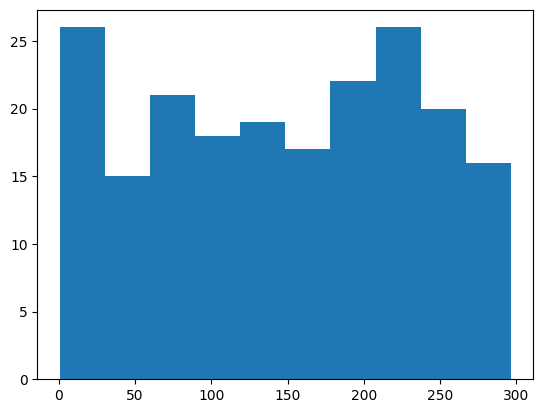

In [ ]:
# plot TV histogram using matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline

plt.hist(df['TV']);

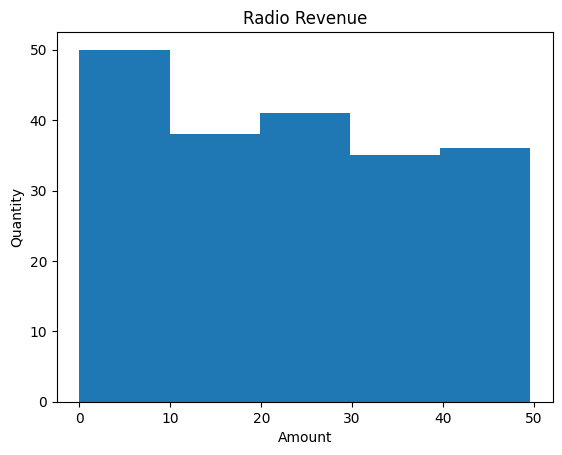

In [ ]:
# plot radio histogram using matplotlib
plt.hist(df['radio'], bins=5)
plt.xlabel('Amount')
plt.ylabel('Quantity')
plt.title('Radio Revenue')
plt.show();

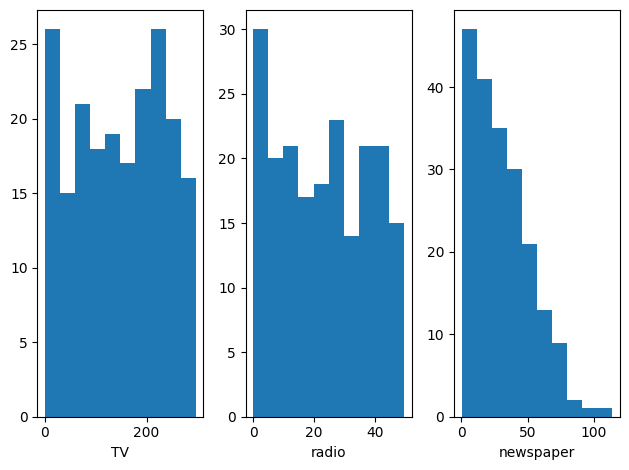

In [ ]:
# using subplots using matplotlib https://matplotlib.org/stable/gallery/statistics/hist.html
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True)
axs[0].hist(df['TV'])
axs[0].set_xlabel('TV')

axs[1].hist(df['radio'])
axs[1].set_xlabel('radio')

axs[2].hist(df['newspaper'])
axs[2].set_xlabel('newspaper')

plt.show();

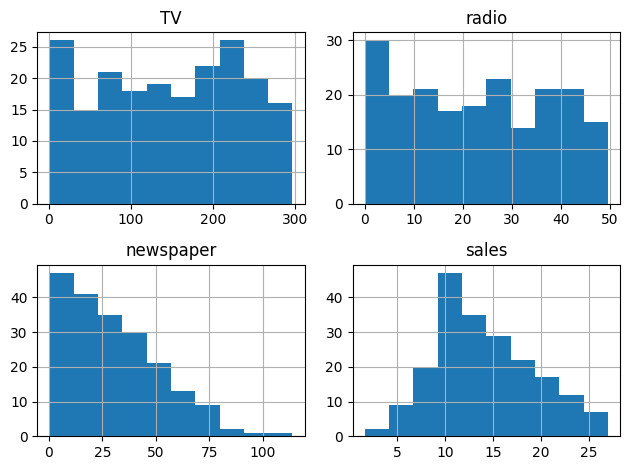

In [ ]:
# using pandas and matplotlib
df.hist()
plt.tight_layout()

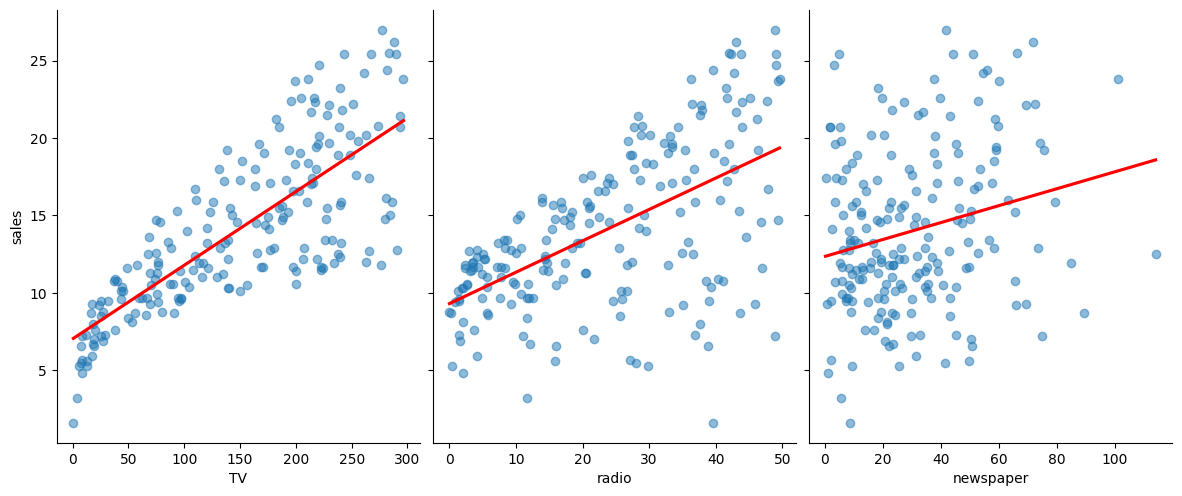

In [ ]:
# scatterplot example with seaborn (sns)
import seaborn as sns

sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'ci': None, 'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales'], axis=1),
                                                    df['sales'],
                                                    test_size=0.20,
                                                    random_state=42)
print(X_train.shape)
print(y_train.shape)

(160, 3)
(160,)


In [ ]:
# build, train (fit), predict, evaluate the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train.values, y_train)
predictions = model.predict(X_test.values)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=predictions)}')
print(f'R-Squared: {r2_score(y_test, predictions)}')

MSE: 3.1740973539761033
R-Squared: 0.899438024100912


In [ ]:
# make a prediction
import numpy as np

tv = 232.1
radio = 8.6
newspaper = 8.7
model.predict(np.array([tv, radio, newspaper]).reshape(1, -1))

array([15.0118875])

In [ ]:
# what are our coefficients?
list(zip(X_train, model.coef_))

[('TV', 0.044729517468716326),
 ('radio', 0.18919505423437652),
 ('newspaper', 0.0027611143413671935)]

## Python Data Model

https://docs.python.org/3/reference/datamodel.html

In [ ]:
# object
obj = ('abc')
print(type(obj))
print(id(obj))

<class 'str'>
138950906794224


In [ ]:
# type
print(type('abc'))
print(type(1))
print(type(1.0))

<class 'str'>
<class 'int'>
<class 'float'>


In [ ]:
# strings (categorical)
print('hello world!')

hello world!


In [ ]:
# adding numbers (numerical)
print(1 + 2)

3


In [ ]:
# adding numbers as strings
print('1' + '2')

12


## Data Structures

https://docs.python.org/3/tutorial/datastructures.html

In [ ]:
# list (mutable)
l = [1, 2, 'hello', 3, 'there']
print(l)
l[4] = 'world'
print(l)

[1, 2, 'hello', 3, 'there']
[1, 2, 'hello', 3, 'world']


In [ ]:
# tuple (immutable)
t = (1, 2, 'hello', 3, 'there')
print(t)
t[4] = 'world'
print(t)

(1, 2, 'hello', 3, 'there')


TypeError: 'tuple' object does not support item assignment

In [ ]:
# set
print({1, 2, 3, 3, 4})

{1, 2, 3, 4}


In [ ]:
# dictionary
d = {'one': 1, 'two': 2, 'three': 3}
print(d)
print(d['one'])

{'one': 1, 'two': 2, 'three': 3}
1


## Numpy

In [ ]:
# random float
# https://www.learndatasci.com/tutorials/applied-introduction-to-numpy-python-tutorial/
import numpy as np

print(np.random.rand())

0.5049368194813049


In [ ]:
# random int
import numpy as np

print(np.random.randint(10))

8


In [ ]:
# matrix of rows and columns
mat = np.random.randint(10, size=(5, 5))
print(mat)

[[9 7 8 3 6]
 [4 7 5 3 2]
 [1 6 6 8 4]
 [1 2 2 6 1]
 [9 1 9 4 8]]


In [ ]:
# slicing [row, col]
print(mat[0:1])

[[9 7 8 3 6]]


In [ ]:
# slicing [row start: end, col start: end]
print(mat[0:3,3:4])

[[3]
 [3]
 [8]]


In [ ]:
# slicing [row start: end, col start: end]
print(mat[:3,3:])

[[3 6]
 [3 2]
 [8 4]]


## Pandas

In [ ]:
# pandas examples
# https://pandas.pydata.org/docs/user_guide/10min.html
import pandas as pd

print(pd.DataFrame(mat))

   0  1  2  3  4
0  9  7  8  3  6
1  4  7  5  3  2
2  1  6  6  8  4
3  1  2  2  6  1
4  9  1  9  4  8


In [ ]:
ex = pd.DataFrame(mat, columns=['col_one', 'col_two', 'col_three', 'col_four', 'col_five'])
print(ex)

   col_one  col_two  col_three  col_four  col_five
0        9        7          8         3         6
1        4        7          5         3         2
2        1        6          6         8         4
3        1        2          2         6         1
4        9        1          9         4         8


In [ ]:
print(ex['col_one'])

0    9
1    4
2    1
3    1
4    9
Name: col_one, dtype: int64


In [ ]:
print(ex.col_one)

0    9
1    4
2    1
3    1
4    9
Name: col_one, dtype: int64


In [ ]:
print(ex.loc[1])

col_one      4
col_two      7
col_three    5
col_four     3
col_five     2
Name: 1, dtype: int64


In [ ]:
print(ex.iloc[0:2,3:5])

   col_four  col_five
0         3         6
1         3         2
